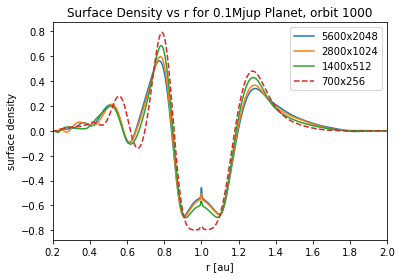

In [47]:
import readfargo as fg
import matplotlib.pyplot as plt

dir1 = './bae2017_01jup5600x2048/'
dir2 = './bae2017_01jup2800x1024/'
dir3 = './bae2017_01jup1400x512/'
dir4 = './bae2017_01jup700x256/'

itime = 100
r0 = 1.0
fargo1    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4) 
fargo1i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir1) 
fargo2i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir2) 
fargo3i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir3) 
fargo4i    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=dir4)

plt.plot(fargo1.r,(fargo1.rho.mean(axis=1)-fargo1i.rho.mean(axis=1))/fargo1i.rho.mean(axis=1), label='5600x2048')
plt.plot(fargo2.r,(fargo2.rho.mean(axis=1)-fargo2i.rho.mean(axis=1))/fargo2i.rho.mean(axis=1), label='2800x1024')
plt.plot(fargo3.r,(fargo3.rho.mean(axis=1)-fargo3i.rho.mean(axis=1))/fargo3i.rho.mean(axis=1), label='1400x512')
plt.plot(fargo4.r,(fargo4.rho.mean(axis=1)-fargo4i.rho.mean(axis=1))/fargo4i.rho.mean(axis=1), label='700x256',linestyle='dashed')
plt.legend()
plt.xlim(0.2,2)
#plt.ylim(-2,4)
plt.xlabel('r [au]')
plt.ylabel('surface density')
plt.title('Surface Density vs r for 0.1Mjup Planet, orbit '+str(itime*10))
plt.savefig('density_plot_allzones1mjup'+str(itime*10)+'.png',dpi=300,bbox_inches='tight')


3000


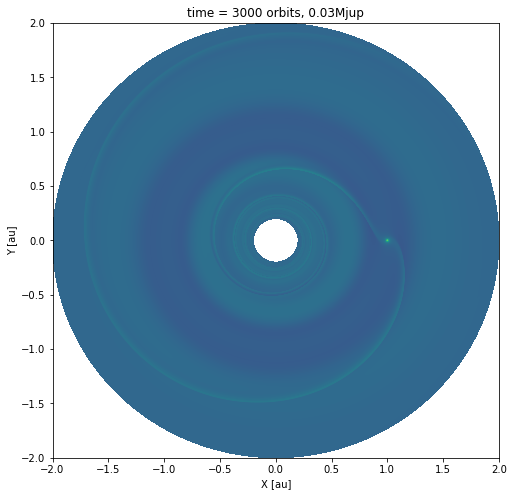

In [12]:
#imaging
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pylab as pl

path = './bae2017_03mth/'

itime = 300
fargo    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path) 
fargoi    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path) 

phi = fargo.phi
rad  = fargo.r

rad2d, phi2d = np.meshgrid(rad, phi) #explain meshgrid?                                                                                                                         

X = rad2d*np.cos(phi2d)
Y = rad2d*np.sin(phi2d)

print(itime*10)

rho_initial   = fargoi.rho
rho   = fargo.rho
vmin = -1.
vmax = 2.
levels = np.linspace(vmin,vmax,256)

fig, ax = plt.subplots(figsize=(8,8))
ax.contourf(X, Y,((rho-rho_initial)/rho_initial).T, levels=levels)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('X [au]')
ax.set_ylabel('Y [au]')
ax.set_title(f'time = {itime*10} orbits, 0.03Mjup')
plt.savefig('dens_image_03mjup3000.png')
